In [ ]:
#Libraries
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm, datasets

In [ ]:
#Read in dataset
df = pd.read_csv('dataset.csv')
# df = df.sample(n= 80000, random_state=21)
# display(df[df['popularity'] > 75])

#Remove unhelpful columns
df_rem = df.drop(columns=['Unnamed: 0', 'track_id', 'track_name'])
df_rem

,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [ ]:
#Limit dataset to a single genre
df_rem = df_rem.loc[df_rem['track_genre']=='party']

#Popularity scores found in "party" genre
df['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

In [ ]:
#Check for null values
substring = 'None'
df_rem[df_rem.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]

,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [ ]:
#Label encode albums
label_encoder = LabelEncoder()
#df_rem['album_name'].unique()
df_rem['album_name'] = label_encoder.fit_transform(df_rem['album_name'])

<ipython-input-8-d5f9893091a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rem['album_name'] = label_encoder.fit_transform(df_rem['album_name'])


In [ ]:
#Drop artists and genre columns
df_rem = df_rem.drop(columns=['track_genre','artists'])
display(df_rem)
#We don't need genre since we're only looking at "party".
#The artists column is difficult to deal with since it is categorical data, so we drop it for simplicity.

,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
78000,305,2,126133,False,0.702,0.839,6,-3.954,0,0.0744,0.02320,0.000261,0.0932,0.348,112.516,1
78001,55,0,180157,False,0.666,0.942,1,-2.928,1,0.0689,0.03070,0.000000,0.2460,0.832,141.913,4
78002,70,0,185437,False,0.442,0.922,5,-2.918,0,0.0695,0.00134,0.000000,0.4320,0.388,140.082,4
78003,70,1,225882,False,0.607,0.958,8,-1.131,1,0.0866,0.04120,0.000000,0.2590,0.404,136.036,4
78004,278,0,239053,False,0.635,0.996,7,-3.107,1,0.0690,0.08790,0.000000,0.1580,0.670,130.033,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78995,233,23,294146,False,0.448,0.768,8,-5.951,1,0.1010,0.10300,0.000000,0.1190,0.489,151.014,4
78996,235,23,204693,False,0.766,0.947,7,-3.878,1,0.0331,0.03480,0.000004,0.3200,0.765,127.951,4
78997,113,24,200893,False,0.634,0.549,4,-7.192,1,0.0244,0.34900,0.000000,0.1080,0.444,98.004,4
78998,205,23,175053,False,0.699,0.905,11,-3.717,0,0.0354,0.01240,0.000142,0.1060,0.971,144.984,4


In [ ]:
#Feature expansion: log base 2, base 10 transforms
df_rem['danceability_log2'] = np.log2(df_rem['danceability'])
df_rem['danceability_log10'] = np.log10(df_rem['danceability'])

In [ ]:
#Normalize the data

#Temporarily drop these since album_name is categorical and popularity is what we're predicting.
modified_df = df_rem.drop(columns=['album_name', 'popularity'])

#Normalize
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(modified_df), columns=modified_df.columns)

#Add back album_name and popluarity
df_norm['album_name'] = df_rem['album_name'].to_numpy()
#Also, condense popularity to 5 sections, as above.
df_norm['popularity'] = df_rem['popularity'].to_numpy()/25
df_norm.popularity = df_norm.popularity.astype(int)
#df_norm_rounded = df_norm.round(2)

display(df_norm)

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,danceability_log2,danceability_log10,album_name,popularity
0,0.030470,0.0,0.583587,0.818898,0.545455,0.731331,0.0,0.117823,0.029487,0.000533,0.085860,0.295634,0.363310,0.00,0.706148,0.706148,305,0
1,0.048957,0.0,0.528875,0.934758,0.090909,0.803004,1.0,0.105142,0.039030,0.000000,0.242138,0.833352,0.568691,0.75,0.659204,0.659204,55,0
2,0.050764,0.0,0.188450,0.912261,0.454545,0.803702,0.0,0.106525,0.001675,0.000000,0.432370,0.340073,0.555899,0.75,0.293611,0.293611,70,0
3,0.064604,0.0,0.439210,0.952756,0.727273,0.928537,1.0,0.145953,0.052389,0.000000,0.255433,0.357849,0.527631,0.75,0.576486,0.576486,70,0
4,0.069111,0.0,0.481763,0.995501,0.636364,0.790499,1.0,0.105372,0.111805,0.000000,0.152135,0.653372,0.485692,0.75,0.616699,0.616699,278,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.087964,0.0,0.197568,0.739033,0.727273,0.591827,1.0,0.179156,0.131017,0.000000,0.112248,0.452283,0.632275,0.75,0.305634,0.305634,233,0
996,0.057353,0.0,0.680851,0.940382,0.636364,0.736640,1.0,0.022596,0.044246,0.000008,0.317822,0.758916,0.471146,0.75,0.783950,0.783950,235,0
997,0.056053,0.0,0.480243,0.492688,0.363636,0.505134,1.0,0.002536,0.444004,0.000000,0.100997,0.402289,0.261922,0.75,0.615294,0.615294,113,0
998,0.047210,0.0,0.579027,0.893138,1.000000,0.747887,0.0,0.027899,0.015747,0.000290,0.098952,0.987779,0.590146,0.75,0.702329,0.702329,205,0


In [ ]:
#decided to keep the original danceability as taking a log reduced correlation
df_norm = df_norm.drop(columns=['danceability_log2','danceability_log10'])
df_norm

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album_name,popularity
0,0.030470,0.0,0.583587,0.818898,0.545455,0.731331,0.0,0.117823,0.029487,0.000533,0.085860,0.295634,0.363310,0.00,305,0
1,0.048957,0.0,0.528875,0.934758,0.090909,0.803004,1.0,0.105142,0.039030,0.000000,0.242138,0.833352,0.568691,0.75,55,0
2,0.050764,0.0,0.188450,0.912261,0.454545,0.803702,0.0,0.106525,0.001675,0.000000,0.432370,0.340073,0.555899,0.75,70,0
3,0.064604,0.0,0.439210,0.952756,0.727273,0.928537,1.0,0.145953,0.052389,0.000000,0.255433,0.357849,0.527631,0.75,70,0
4,0.069111,0.0,0.481763,0.995501,0.636364,0.790499,1.0,0.105372,0.111805,0.000000,0.152135,0.653372,0.485692,0.75,278,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.087964,0.0,0.197568,0.739033,0.727273,0.591827,1.0,0.179156,0.131017,0.000000,0.112248,0.452283,0.632275,0.75,233,0
996,0.057353,0.0,0.680851,0.940382,0.636364,0.736640,1.0,0.022596,0.044246,0.000008,0.317822,0.758916,0.471146,0.75,235,0
997,0.056053,0.0,0.480243,0.492688,0.363636,0.505134,1.0,0.002536,0.444004,0.000000,0.100997,0.402289,0.261922,0.75,113,0
998,0.047210,0.0,0.579027,0.893138,1.000000,0.747887,0.0,0.027899,0.015747,0.000290,0.098952,0.987779,0.590146,0.75,205,0


In [ ]:
#Splitting our dataset
X_train, X_test, y_train, y_test = train_test_split(df_norm.drop(['popularity'], axis=1), df_norm.popularity, test_size=0.2, random_state=21)

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)
y_train.value_counts()

(200, 15)
(800, 15)
(200,)
(800,)


1    443
0    341
2     16
Name: popularity, dtype: int64

In [ ]:
#SVM best model
svmpoly = SVC(kernel='rbf', gamma=1, decision_function_shape='ovo')
svmpoly.fit(X_train,y_train)
rbf_pred = rbf.predict(X_test)
cm_rbf = classification_report(y_test, rbf_pred)
print(cm_rbf)

#test other models

#linear = svm.SVC(kernel='linear', decision_function_shape='ovo').fit(X_train, y_train)
#poly = svm.SVC(kernel='poly', degree=3, decision_function_shape='ovo').fit(X_train, y_train)
#sig = svm.SVC(kernel='sigmoid', decision_function_shape='ovo').fit(X_train, y_train)

#linear_pred = linear.predict(X_test)
#poly_pred = poly.predict(X_test)
#sig_pred = sig.predict(X_test)

#cm_lin = classification_report(y_test, linear_pred)
#cm_poly = classification_report(y_test, poly_pred)
#cm_sig = classification_report(y_test, sig_pred)

#print(cm_lin)
#print(cm_poly)
#print(cm_sig)

NameError: ignored

In [ ]:
df_album_energy = df_norm[['album_name', 'energy']]
print(df_album_energy)
y = df_norm.popularity
X_train, X_test, y_train, y_test = train_test_split(df_album_energy, y, test_size = 0.30)

     album_name    energy
0           305  0.818898
1            55  0.934758
2            70  0.912261
3            70  0.952756
4           278  0.995501
..          ...       ...
995         233  0.739033
996         235  0.940382
997         113  0.492688
998         205  0.893138
999           0  0.865017

[1000 rows x 2 columns]


In [ ]:
svmpoly = SVC(kernel='rbf', gamma=1, decision_function_shape='ovo')
svmpoly.fit(X_train,y_train)
yhatpoly = svmpoly.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


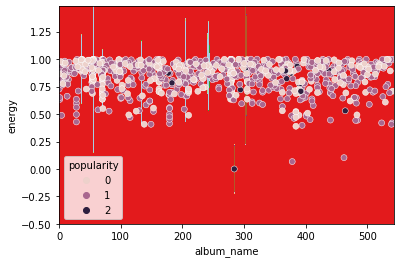

In [ ]:
#graph attempt
meshstep = .02
plotx_min, plotx_max = df_album_energy['album_name'].min()-0.5, df_album_energy['album_name'].max()+0.5
ploty_min, ploty_max = df_album_energy['energy'].min()-0.5, df_album_energy['energy'].max()+0.5
xx, yy = np.meshgrid(np.arange(plotx_min, plotx_max, meshstep),
                     np.arange(ploty_min, ploty_max, meshstep))
Z = svmpoly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.contourf(xx, yy, Z)
plt.axis('tight')
sns.scatterplot(data = df_album_energy, x = 'album_name', y = 'energy', hue = y)

In [ ]:
df_album_loudness = df_norm[['album_name', 'loudness']]
print(df_album_loudness)
y = df_norm.popularity
X_train, X_test, y_train, y_test = train_test_split(df_album_loudness, y, test_size = 0.30)

     album_name  loudness
0           305  0.731331
1            55  0.803004
2            70  0.803702
3            70  0.928537
4           278  0.790499
..          ...       ...
995         233  0.591827
996         235  0.736640
997         113  0.505134
998         205  0.747887
999           0  0.690744

[1000 rows x 2 columns]


In [ ]:
svmpoly = SVC(kernel='rbf', gamma=1, decision_function_shape='ovo')
svmpoly.fit(X_train,y_train)
yhatpoly = svmpoly.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


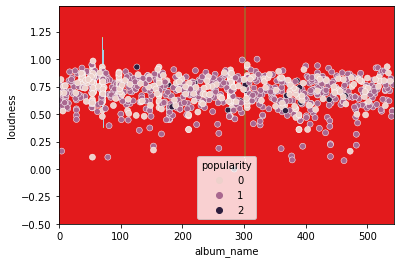

In [ ]:
#graph attempt
meshstep = .02
plotx_min, plotx_max = df_album_loudness['album_name'].min()-0.5, df_album_loudness['album_name'].max()+0.5
ploty_min, ploty_max = df_album_loudness['loudness'].min()-0.5, df_album_loudness['loudness'].max()+0.5
xx, yy = np.meshgrid(np.arange(plotx_min, plotx_max, meshstep),
                     np.arange(ploty_min, ploty_max, meshstep))
Z = svmpoly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.contourf(xx, yy, Z)
plt.axis('tight')
sns.scatterplot(data = df_album_loudness, x = 'album_name', y = 'loudness', hue = y)

In [ ]:
df_energy_loudness = df_norm[['energy', 'loudness']]
print(df_album_loudness)
y = df_norm.popularity
X_train, X_test, y_train, y_test = train_test_split(df_energy_loudness, y, test_size = 0.30)

     album_name  loudness
0           305  0.731331
1            55  0.803004
2            70  0.803702
3            70  0.928537
4           278  0.790499
..          ...       ...
995         233  0.591827
996         235  0.736640
997         113  0.505134
998         205  0.747887
999           0  0.690744

[1000 rows x 2 columns]


In [ ]:
svmpoly = SVC(kernel='rbf', gamma=1, decision_function_shape='ovo')
svmpoly.fit(X_train,y_train)
yhatpoly = svmpoly.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


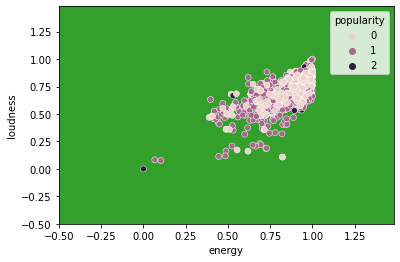

In [ ]:
#graph attempt
meshstep = .02
plotx_min, plotx_max = df_energy_loudness['energy'].min()-0.5, df_energy_loudness['energy'].max()+0.5
ploty_min, ploty_max = df_energy_loudness['loudness'].min()-0.5, df_energy_loudness['loudness'].max()+0.5
xx, yy = np.meshgrid(np.arange(plotx_min, plotx_max, meshstep),
                     np.arange(ploty_min, ploty_max, meshstep))
Z = svmpoly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.contourf(xx, yy, Z)
plt.axis('tight')
sns.scatterplot(data = df_energy_loudness, x = 'energy', y = 'loudness', hue = y)